# 第6章 決定木系回帰予測を行う10本ノック
# Iris版


## Data 
####sepal length (cm) : がく片の長さ 
####sepal width (cm) : がく片の幅 
####petal length (cm) : 花弁の長さ 
####petal width (cm) : 花弁の幅


## Target アヤメの種類
### 'setosa', 'versicolor', 'virginica'


## ノック51:決定木モデルを構築しよう


In [47]:
from sklearn.datasets import load_iris
import pandas as pd


# california = fetch_california_housing()
iris = load_iris()
#print(iris)
df = pd.DataFrame(iris.data,columns=[["sepal_length","sepal_width","petal_length","petal_width"]])
df_target = pd.DataFrame(iris.target,columns=[["target"]])
display(df.head(20))
display(df_target.head(60))
print (iris)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# X = df
# y = df_target

X = pd.concat([df[["sepal_length","sepal_width","petal_length"]],df_target], axis=1)
y = df[["petal_width"]]

display(X.head(60))
display(y.head())

,sepal_length,sepal_width,petal_length,target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
5,5.4,3.9,1.7,0
6,4.6,3.4,1.4,0
7,5.0,3.4,1.5,0
8,4.4,2.9,1.4,0
9,4.9,3.1,1.5,0


,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

105


,sepal_length,sepal_width,petal_length,target
60,5.0,2.0,3.5,1
116,6.5,3.0,5.5,2
144,6.7,3.3,5.7,2
119,6.0,2.2,5.0,2
108,6.7,2.5,5.8,2


45


,sepal_length,sepal_width,petal_length,target
114,5.8,2.8,5.1,2
62,6.0,2.2,4.0,1
33,5.5,4.2,1.4,0
107,7.3,2.9,6.3,2
7,5.0,3.4,1.5,0


In [5]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0).fit(X_train,y_train)

[Text(0.5, 0.875, 'x[3] <= 0.5\nsquared_error = 0.603\nsamples = 105\nvalue = 1.228'),
 Text(0.25, 0.625, 'x[2] <= 1.65\nsquared_error = 0.009\nsamples = 34\nvalue = 0.232'),
 Text(0.125, 0.375, 'x[1] <= 4.25\nsquared_error = 0.006\nsamples = 31\nvalue = 0.219'),
 Text(0.0625, 0.125, 'squared_error = 0.005\nsamples = 30\nvalue = 0.213'),
 Text(0.1875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.4'),
 Text(0.375, 0.375, 'x[0] <= 5.25\nsquared_error = 0.016\nsamples = 3\nvalue = 0.367'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 0.5'),
 Text(0.4375, 0.125, 'squared_error = 0.01\nsamples = 2\nvalue = 0.3'),
 Text(0.75, 0.625, 'x[3] <= 1.5\nsquared_error = 0.186\nsamples = 71\nvalue = 1.704'),
 Text(0.625, 0.375, 'x[2] <= 4.35\nsquared_error = 0.042\nsamples = 32\nvalue = 1.306'),
 Text(0.5625, 0.125, 'squared_error = 0.016\nsamples = 18\nvalue = 1.172'),
 Text(0.6875, 0.125, 'squared_error = 0.022\nsamples = 14\nvalue = 1.479'),
 Text(0.875, 0.375, 'x[1] <= 3

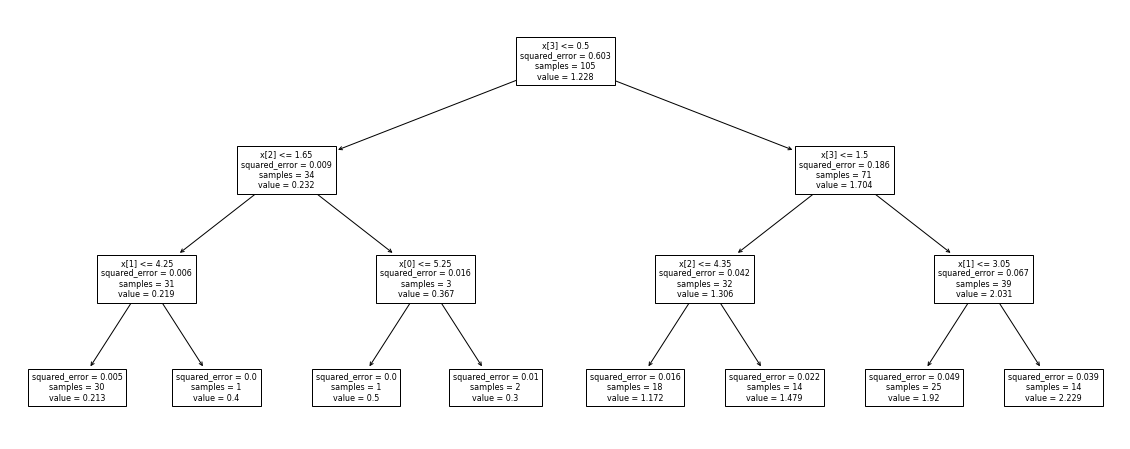

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(tree_reg,fontsize=8)

## ノック52:決定木モデルを評価しよう

In [7]:
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

import numpy as np

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

105
[[1.17222222]
 [1.92      ]
 [2.22857143]
 [1.92      ]
 [1.92      ]]
45
[[1.92      ]
 [1.17222222]
 [0.21333333]
 [1.92      ]
 [0.21333333]]


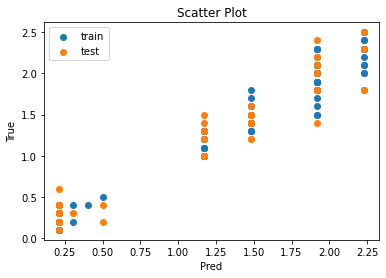

In [8]:
plt.scatter(y_train_pred, y_train, label="train")
plt.scatter(y_test_pred, y_test, label="test")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()

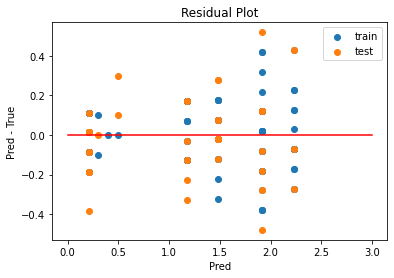

In [10]:
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
  plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
  plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
  plt.plot([0, 3], [0,0] ,color="red")
  plt.xlabel("Pred")
  plt.ylabel("Pred - True")
  plt.title("Residual Plot")
  plt.legend()
  plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_eval_score(y_true,y_pred):

      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.11655631141345427
  MSE = 0.0242182917611489
  RMSE = 0.15562227270268514
  R2 = 0.9598210702877964
テストデータスコア
  MAE = 0.1413121693121693
  MSE = 0.03797953360768176
  RMSE = 0.19488338463727933
  R2 = 0.9256922168545357


## ノック53:決定木の深さを変えてみよう

In [17]:
tree_reg_depth_4 = DecisionTreeRegressor(max_depth=4, random_state=0).fit(X_train,y_train)
tree_reg_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=0).fit(X_train,y_train)
tree_reg_depth_10 = DecisionTreeRegressor(max_depth=10, random_state=0).fit(X_train,y_train)
tree_reg_depth_15 = DecisionTreeRegressor(max_depth=15, random_state=0).fit(X_train,y_train)

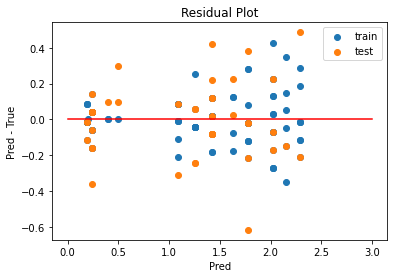

In [18]:
y_train_pred = tree_reg_depth_4.predict(X_train)
y_test_pred = tree_reg_depth_4.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [19]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.09499278499278499
  MSE = 0.01730123342266199
  RMSE = 0.13153415306551372
  R2 = 0.9712966939006524
テストデータスコア
  MAE = 0.15213275613275612
  MSE = 0.04157924247456354
  RMSE = 0.20390988812356192
  R2 = 0.9186493082019409


In [20]:
tree_reg_depth_20 = DecisionTreeRegressor(max_depth=20, random_state=0).fit(X_train,y_train)

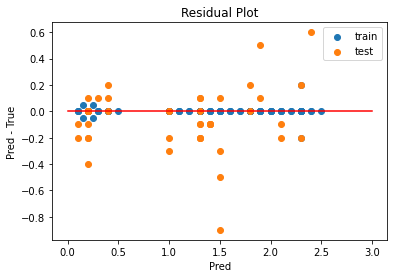

In [21]:
  y_train_pred = tree_reg_depth_20.predict(X_train)
  y_test_pred = tree_reg_depth_20.predict(X_test)

  y_train_pred = np.expand_dims(y_train_pred, 1)
  y_test_pred = np.expand_dims(y_test_pred, 1)

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [22]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.005714285714285715
  MSE = 0.0008571428571428569
  RMSE = 0.02927700218845599
  R2 = 0.9985779722636876
テストデータスコア
  MAE = 0.16666666666666666
  MSE = 0.058888888888888886
  RMSE = 0.24267032964268392
  R2 = 0.8847826086956522


In [23]:
tree_reg_depth_100 = DecisionTreeRegressor(max_depth=100, random_state=0).fit(X_train,y_train)

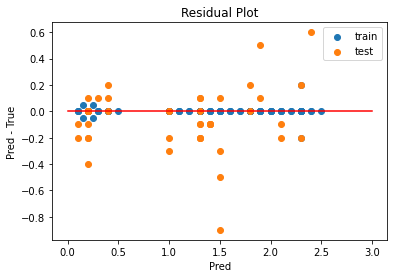

In [24]:
  y_train_pred = tree_reg_depth_100.predict(X_train)
  y_test_pred = tree_reg_depth_100.predict(X_test)

  y_train_pred = np.expand_dims(y_train_pred, 1)
  y_test_pred = np.expand_dims(y_test_pred, 1)

  residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [25]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.005714285714285715
  MSE = 0.0008571428571428569
  RMSE = 0.02927700218845599
  R2 = 0.9985779722636876
テストデータスコア
  MAE = 0.16666666666666666
  MSE = 0.058888888888888886
  RMSE = 0.24267032964268392
  R2 = 0.8847826086956522


## ノック54:最小サンプル数を変えてみよう

In [26]:
tree_reg_samples_5 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5,random_state=0).fit(X_train,y_train)

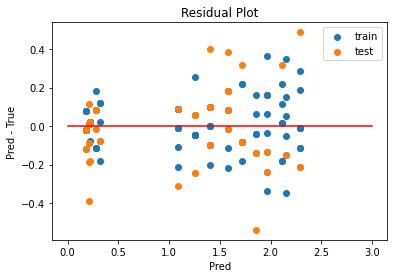

In [27]:
y_train_pred = tree_reg_samples_5.predict(X_train)
y_test_pred = tree_reg_samples_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [28]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.09769841269841269
  MSE = 0.016758994708994706
  RMSE = 0.1294565359840696
  R2 = 0.9721962854729459
テストデータスコア
  MAE = 0.1551851851851852
  MSE = 0.041165452674897116
  RMSE = 0.20289271222716976
  R2 = 0.9194588969404187


## ノック55:ランダムフォレストモデルの構築・評価をしよう

In [29]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)

<ipython-input-29-9cd720708612>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)


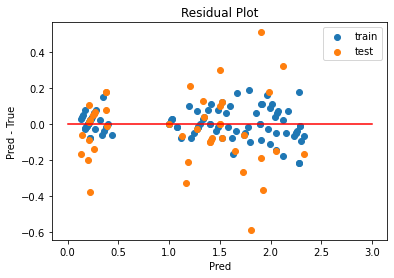

In [30]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [31]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.057238095238095234
  MSE = 0.005885462962962961
  RMSE = 0.07671677106710736
  R2 = 0.990235826496565
テストデータスコア
  MAE = 0.1499259259259259
  MSE = 0.03956777777777778
  RMSE = 0.19891650956564108
  R2 = 0.9225847826086957


## ノック56:ランダムフォレストの決定木の数を変えてみよう

In [32]:
rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train,y_train)

<ipython-input-32-ecd6c9edbd0e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_change_param = RandomForestRegressor(n_estimators=3, max_depth=20, random_state=0).fit(X_train,y_train)


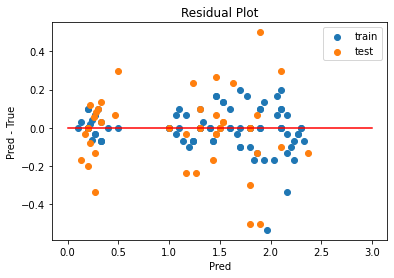

In [33]:
y_train_pred = rf_change_param.predict(X_train)
y_test_pred = rf_change_param.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [34]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.060529100529100544
  MSE = 0.009800705467372134
  RMSE = 0.09899851245029964
  R2 = 0.9837403124882961
テストデータスコア
  MAE = 0.1349382716049383
  MSE = 0.03708436213991771
  RMSE = 0.19257300470189925
  R2 = 0.9274436392914653


## ノック57:交差検証法でモデルを評価しよう

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rf_cv = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
rf_scores = cross_val_score(estimator=rf_cv, X=X, y=y, cv=k_fold, scoring="r2")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [36]:
print(f"各分割のスコア：{rf_scores}")
print(f"平均スコア：{np.mean(rf_scores)}")

各分割のスコア：[0.89537132 0.88892833 0.95291774 0.92633571 0.95169966]
平均スコア：0.9230505531931449


## ノック58:勾配ブースティング決定木モデルを構築・評価しよう

In [37]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=0)
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
xgb_scores = cross_val_score(xgb_reg, X, y, cv=k_fold, scoring="r2")

In [38]:
print(f"各分割のスコア：{xgb_scores}")
print(f"平均スコア：{np.mean(xgb_scores)}")

各分割のスコア：[0.91857128 0.88227862 0.92956573 0.94438849 0.94607941]
平均スコア：0.9241767050227121


## ノック59:グリッドサーチでハイパーパラメータをチューニングしよう

In [39]:
xgb_reg_grid = xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }

k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(estimator=xgb_reg_grid,param_grid=params,cv=k_fold,scoring="r2")

In [40]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
500 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
   

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inter...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.1, 0.25, 0, 5, 0.75, 1.0],
                         'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 30, 50, 100],
                         'random_state': [0]},
             scoring='r2')

In [41]:
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50, 'random_state': 0}
0.9492613864095034


In [42]:
y_test_pred = grid.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 0.13763437403572928
  MSE = 0.03915168470905422
  RMSE = 0.19786784657708845
  R2 = 0.9233988777431548


## ノック60:ランダムサーチでパラメータを調整しよう

In [43]:
xgb_reg_random = xgb.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

params = {"booster": ["gbtree"],
            "n_estimators":[10,30,50,100],
            "max_depth":[2, 3, 4, 5, 6],
            "learning_rate":[0.1,0.25,0.5,0.75,1.0],
            "colsample_bytree":[0.1,0.25, 0,5, 0.75, 1.0],
            "random_state":[0]
            }


k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
random = RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,scoring="r2",cv=k_fold,n_iter=30,random_state=0)

In [44]:
random.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.8/dist-packages/xgboost/core.py", line 620, in inner_f
    re

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=30,
                   param_distributions={'booster': ['gbtree'],
                                        'colsample_bytree': [0.1, 0.25, 0, 5,
                                                             0.75, 1.0],
                                        'learning_rate': [0.1, 0.25, 0.5, 0.75,
                                                          1.0],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 30, 50, 100],
                                        'random_state': [0]},
                   random_state=0, scoring='r2')

In [45]:
print(random.best_params_)
print(random.best_score_)

{'random_state': 0, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.25, 'colsample_bytree': 1.0, 'booster': 'gbtree'}
0.9411756730382128


In [46]:
y_test_pred = random.predict(X_test)
y_test_pred = np.expand_dims(y_test_pred, 1)

print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 0.15124836875332723
  MSE = 0.043618356479733396
  RMSE = 0.20885008134959726
  R2 = 0.9146597373222608
